# Convergence Analysis by Dimensional Setting

This notebook creates convergence plots showing how PEHE and PEHE Plug-in metrics stabilize as R increases.
Each dimensional setting gets its own figure with separate plots for X_CB and X_RF models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

## Load Data from R_20 Results

In [5]:
# Settings and models
settings = ['1d', '2d', '4d', '6d']
models = ['x_cb', 'x_rf']

# Load data from R_20 folder only
all_data = []
folder_path = Path('../../results/R_20')

if not folder_path.exists():
    print(f"Error: Folder {folder_path} does not exist!")
else:
    for setting in settings:
        for model in models:
            file_path = folder_path / setting / model / 'raw_results.csv'
            
            if file_path.exists():
                df = pd.read_csv(file_path)
                df['setting'] = setting
                df['model'] = model
                all_data.append(df)
                print(f"Loaded: {setting}/{model} - {len(df)} records")
            else:
                print(f"Warning: File {file_path} not found")

# Combine all data
if len(all_data) > 0:
    combined_df = pd.concat(all_data, ignore_index=True)
    print(f"\nTotal records loaded: {len(combined_df)}")
    print(f"Data shape: {combined_df.shape}")
    print(f"Columns: {list(combined_df.columns)}")
    print(f"\nSample data:")
    print(combined_df.head(10))
else:
    print("No data loaded. Please check your folder structure.")

Loaded: 1d/x_cb - 60 records
Loaded: 1d/x_rf - 60 records
Loaded: 2d/x_cb - 60 records
Loaded: 2d/x_rf - 60 records
Loaded: 4d/x_cb - 40 records
Loaded: 4d/x_rf - 40 records
Loaded: 6d/x_cb - 40 records
Loaded: 6d/x_rf - 40 records

Total records loaded: 400
Data shape: (400, 7)
Columns: ['learner', 'tuner', 'rep', 'pehe', 'pehe_plug', 'setting', 'model']

Sample data:
  learner tuner  rep      pehe  pehe_plug setting model
0    x_cb  grid    0  0.079249   0.250171      1d  x_cb
1    x_cb  grid    1  0.133617   0.422495      1d  x_cb
2    x_cb  grid    2  0.193811   0.437912      1d  x_cb
3    x_cb  grid    3  0.172587   0.298451      1d  x_cb
4    x_cb  grid    4  0.093824   0.288762      1d  x_cb
5    x_cb  grid    5  0.107162   0.390872      1d  x_cb
6    x_cb  grid    6  0.089467   0.396673      1d  x_cb
7    x_cb  grid    7  0.106284   0.296269      1d  x_cb
8    x_cb  grid    8  0.127580   0.369660      1d  x_cb
9    x_cb  grid    9  0.144105   0.309147      1d  x_cb


## Verify Data Structure

In [6]:
# The data is already in the right format - each row represents one repetition
# We just need to ensure rep column represents the repetition number (1-20)
print("Data preview:")
print(combined_df.head(10))
print(f"\nRepetition range: {combined_df['rep'].min()} to {combined_df['rep'].max()}")
print(f"Unique settings: {sorted(combined_df['setting'].unique())}")
print(f"Unique models: {sorted(combined_df['model'].unique())}")
print(f"Unique tuners: {sorted(combined_df['tuner'].unique())}")

Data preview:
  learner tuner  rep      pehe  pehe_plug setting model
0    x_cb  grid    0  0.079249   0.250171      1d  x_cb
1    x_cb  grid    1  0.133617   0.422495      1d  x_cb
2    x_cb  grid    2  0.193811   0.437912      1d  x_cb
3    x_cb  grid    3  0.172587   0.298451      1d  x_cb
4    x_cb  grid    4  0.093824   0.288762      1d  x_cb
5    x_cb  grid    5  0.107162   0.390872      1d  x_cb
6    x_cb  grid    6  0.089467   0.396673      1d  x_cb
7    x_cb  grid    7  0.106284   0.296269      1d  x_cb
8    x_cb  grid    8  0.127580   0.369660      1d  x_cb
9    x_cb  grid    9  0.144105   0.309147      1d  x_cb

Repetition range: 0 to 19
Unique settings: ['1d', '2d', '4d', '6d']
Unique models: ['x_cb', 'x_rf']
Unique tuners: ['bayes', 'grid', 'random']


## Create Convergence Plots for Each Dimensional Setting

Available tuners: ['bayes', 'grid', 'random']


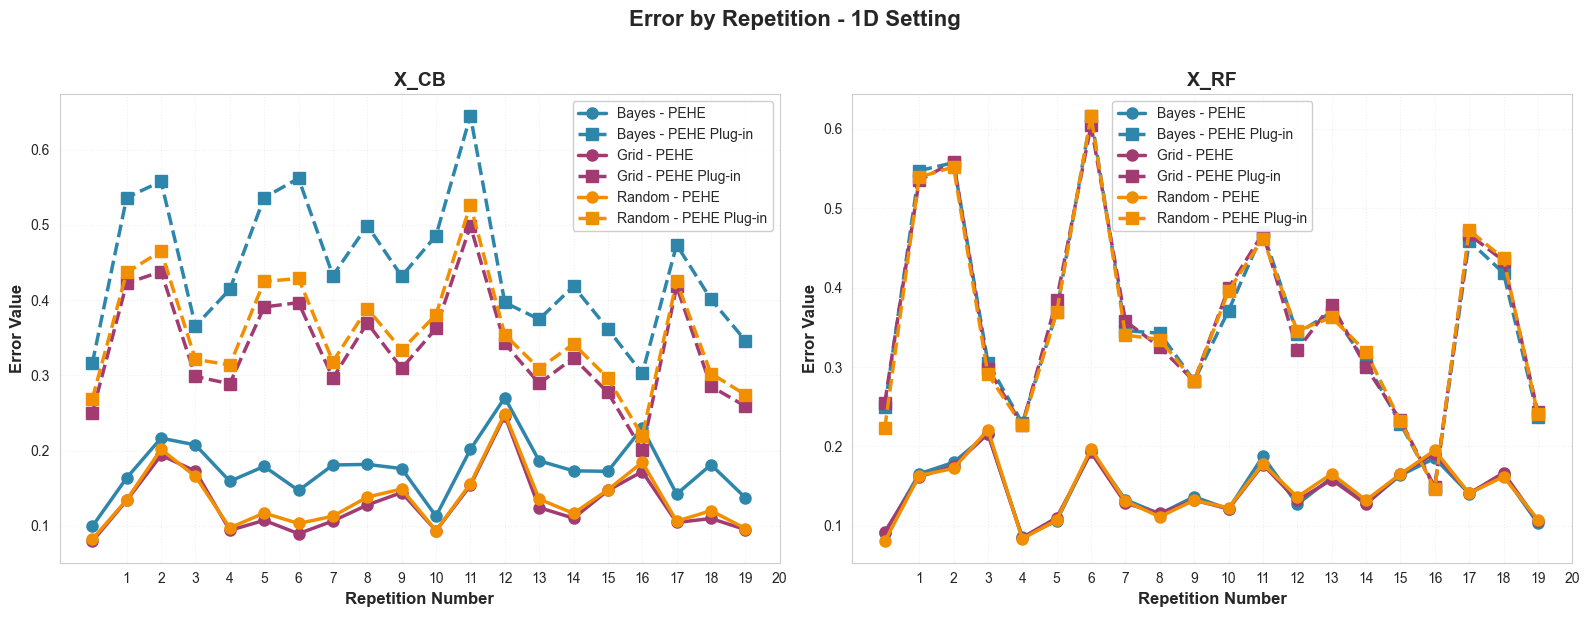

Saved: error_by_repetition_1d.png


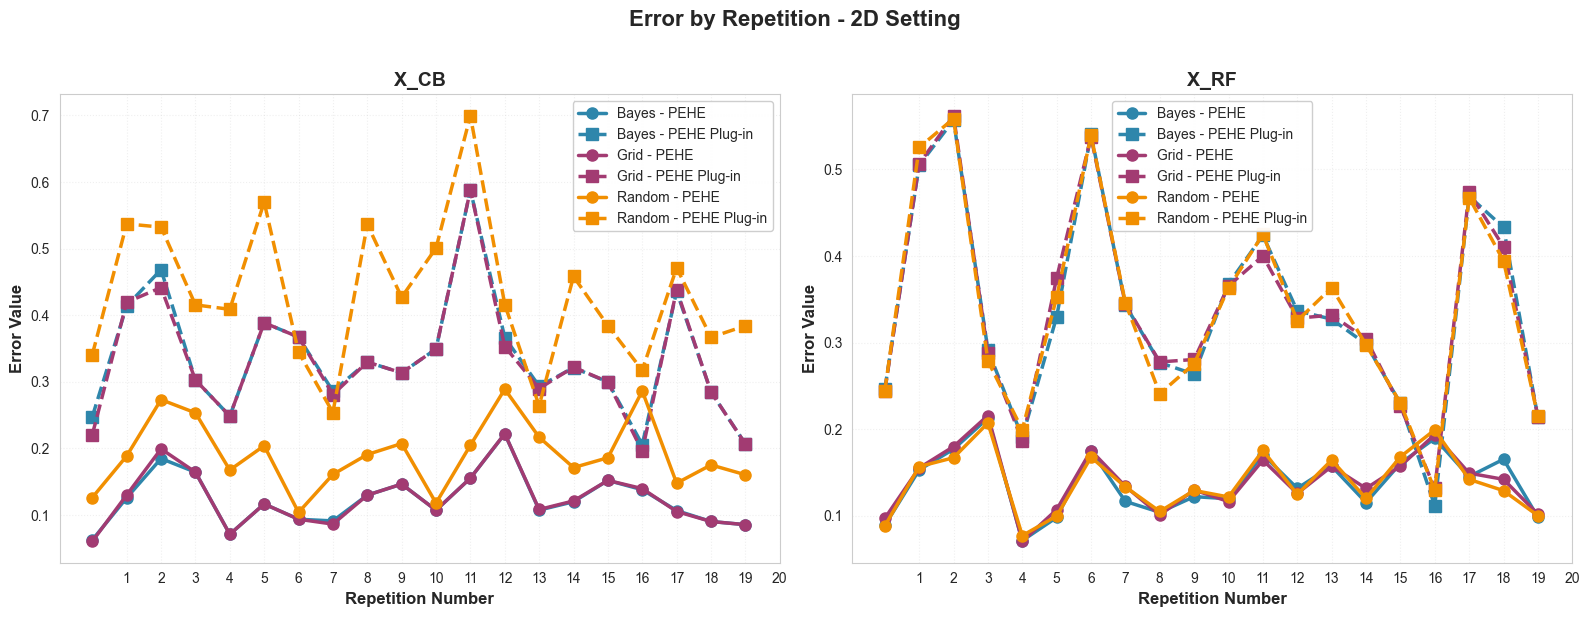

Saved: error_by_repetition_2d.png


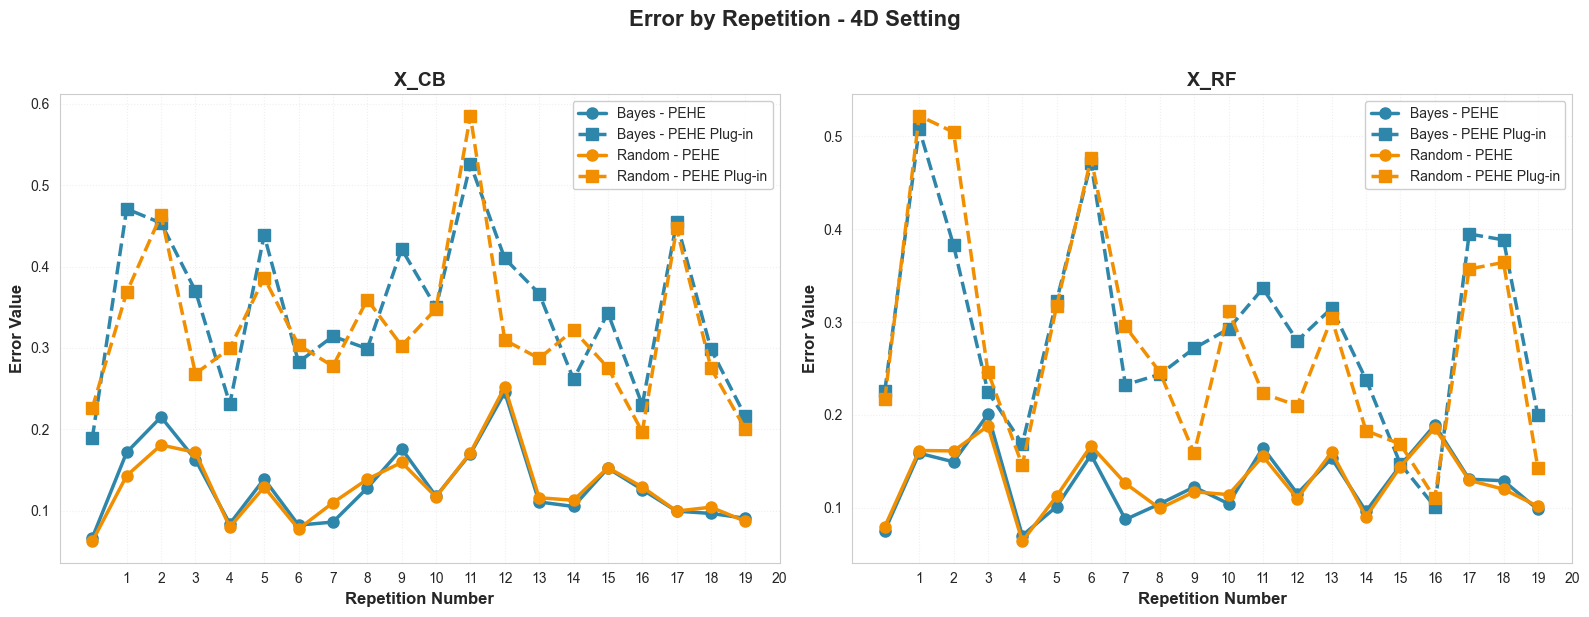

Saved: error_by_repetition_4d.png


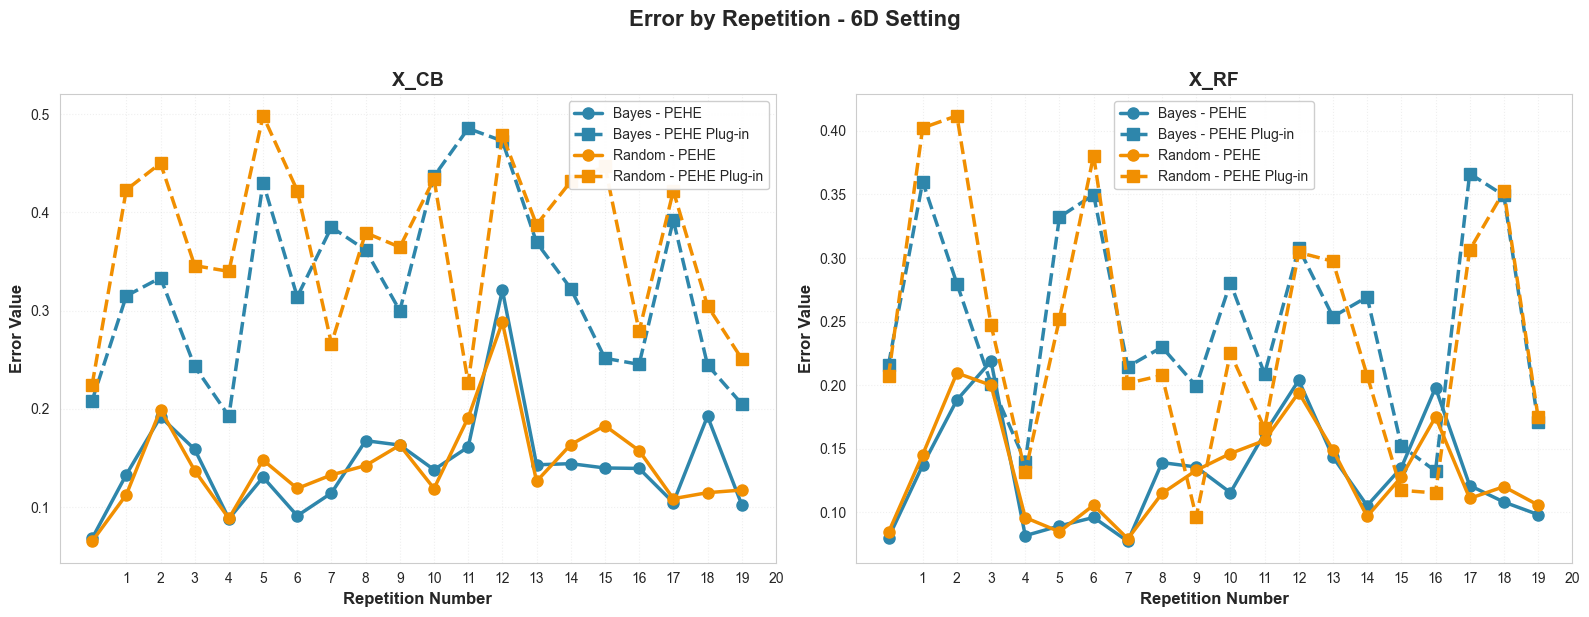

Saved: error_by_repetition_6d.png


In [8]:
# Define colors for tuners
tuner_colors = {
    'bayes': '#2E86AB',
    'grid': '#A23B72',
    'random': '#F18F01'
}

# Get all unique tuners in the data
available_tuners = sorted(combined_df['tuner'].unique())
print(f"Available tuners: {available_tuners}")

# Create plots for each dimensional setting
for setting in settings:
    setting_data = combined_df[combined_df['setting'] == setting]
    
    if len(setting_data) == 0:
        print(f"No data for {setting}, skipping...")
        continue
    
    # Create figure with 2 subplots (one for each model)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Error by Repetition - {setting.upper()} Setting', 
                 fontsize=16, fontweight='bold', y=1.02)
    
    for idx, model in enumerate(models):
        ax = axes[idx]
        model_data = setting_data[setting_data['model'] == model]
        
        if len(model_data) == 0:
            ax.text(0.5, 0.5, f'No data for {model}', 
                   ha='center', va='center', transform=ax.transAxes)
            continue
        
        # Plot for each tuner
        for tuner in available_tuners:
            tuner_data = model_data[model_data['tuner'] == tuner].sort_values('rep')
            
            if len(tuner_data) == 0:
                continue
            
            color = tuner_colors.get(tuner, '#666666')
            
            # Plot PEHE with solid line
            ax.plot(tuner_data['rep'], tuner_data['pehe'], 
                    color=color, linestyle='-', linewidth=2.5, 
                    marker='o', markersize=8, 
                    label=f'{tuner.capitalize()} - PEHE')
            
            # Plot PEHE Plug-in with dashed line
            ax.plot(tuner_data['rep'], tuner_data['pehe_plug'], 
                    color=color, linestyle='--', linewidth=2.5, 
                    marker='s', markersize=8, 
                    label=f'{tuner.capitalize()} - PEHE Plug-in')
        
        ax.set_title(f'{model.upper()}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Repetition Number', fontsize=12, fontweight='bold')
        ax.set_ylabel('Error Value', fontsize=12, fontweight='bold')
        # Show all repetition numbers 1-20 on x-axis
        ax.set_xticks(range(1, 21))
        ax.legend(loc='best', fontsize=10, framealpha=0.95)
        ax.grid(True, alpha=0.3, linestyle=':')
    
    plt.tight_layout()
    filename = f'error_by_repetition_{setting}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved: {filename}")